In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # import statsmodels
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
crossvalidation = KFold(n=X.shape[0], n_folds=5,
 shuffle=True, random_state=1)
import graphviz 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
dui_tax_short = pd.DataFrame.from_csv('dui_tax_short.csv', index_col=None)

In [3]:
dui_tax_short

,ACC_MIL,ACH_MIL,YEAR,STATE_SHORT,POP_MIL,SUSPEND,INTERLOCK_1ST,INTERLOCK_REPEAT,GALLONS_ALCOHOL_PER_CAP_21,BEER_TAX,PERCENT_POVERTY,MEDIAN_INCOME,PERCENT_UNINSURE,LESS_HS_P,HS_P,SOME_C_P,BACHELORS_P,GRAD_PROF_P
0,806.136433,48.569874,2011,AL,4.858979,yes,no,yes,22331,1.05,19.1,41427,16.6,0.180897,0.314334,0.285068,0.139643,0.080058
1,806.136433,46.100220,2012,AL,4.858979,yes,no,yes,22656,1.05,19.0,41610,15.8,0.174023,0.313100,0.290229,0.141521,0.081127
2,806.136433,44.042174,2013,AL,4.858979,yes,no,yes,22491,1.05,18.9,42882,15.9,0.168852,0.310562,0.294274,0.143547,0.082766
3,806.136433,47.952461,2014,AL,4.858979,yes,no,yes,22481,1.05,19.2,42917,14.2,0.162953,0.310687,0.295833,0.144587,0.085940
4,398.140926,24.375975,2011,AK,0.738432,yes,no,yes,32713,1.07,10.8,65699,21.7,0.086375,0.272442,0.369075,0.176662,0.095446
5,398.140926,20.313313,2012,AK,0.738432,yes,no,yes,32236,1.07,10.8,66503,22.3,0.084130,0.270973,0.370134,0.177505,0.097258
6,398.140926,20.313313,2013,AK,0.738432,yes,no,yes,31277,1.07,10.1,70058,20.8,0.083634,0.273077,0.368287,0.177079,0.097924
7,398.140926,35.209742,2014,AK,0.738432,yes,no,yes,31696,1.07,11.4,70898,19.0,0.081900,0.275051,0.366203,0.178704,0.098143
8,555.501449,28.265695,2011,AZ,6.828065,yes,no,yes,27228,0.16,19.0,46710,19.6,0.148176,0.247291,0.340564,0.168360,0.095609
9,555.501449,28.705058,2012,AZ,6.828065,yes,no,yes,27627,0.16,18.7,47796,20.4,0.145577,0.243979,0.344151,0.169160,0.097133


In [4]:
features = pd.DataFrame(dui_tax_short)
features = features.drop('ACH_MIL', axis=1)
features = features.drop('ACC_MIL', axis=1)

targets = dui_tax_short.ACH_MIL

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
features.columns

Index(['YEAR', 'STATE_SHORT', 'POP_MIL', 'SUSPEND', 'INTERLOCK_1ST',
       'INTERLOCK_REPEAT', 'GALLONS_ALCOHOL_PER_CAP_21', 'BEER_TAX',
       'PERCENT_POVERTY', 'MEDIAN_INCOME', 'PERCENT_UNINSURE', 'LESS_HS_P',
       'HS_P', 'SOME_C_P', 'BACHELORS_P', 'GRAD_PROF_P'],
      dtype='object')

In [7]:
range(len(features.columns))

range(0, 16)

In [8]:
#rf in python cannot take strings
#range(len(features.columns)
for i in [1,3,4,5]:
    features.iloc[:,i] = le.fit_transform(features.iloc[:,i])

In [9]:
features

,YEAR,STATE_SHORT,POP_MIL,SUSPEND,INTERLOCK_1ST,INTERLOCK_REPEAT,GALLONS_ALCOHOL_PER_CAP_21,BEER_TAX,PERCENT_POVERTY,MEDIAN_INCOME,PERCENT_UNINSURE,LESS_HS_P,HS_P,SOME_C_P,BACHELORS_P,GRAD_PROF_P
0,2011,1,4.858979,1,0,2,22331,1.05,19.1,41427,16.6,0.180897,0.314334,0.285068,0.139643,0.080058
1,2012,1,4.858979,1,0,2,22656,1.05,19.0,41610,15.8,0.174023,0.313100,0.290229,0.141521,0.081127
2,2013,1,4.858979,1,0,2,22491,1.05,18.9,42882,15.9,0.168852,0.310562,0.294274,0.143547,0.082766
3,2014,1,4.858979,1,0,2,22481,1.05,19.2,42917,14.2,0.162953,0.310687,0.295833,0.144587,0.085940
4,2011,0,0.738432,1,0,2,32713,1.07,10.8,65699,21.7,0.086375,0.272442,0.369075,0.176662,0.095446
5,2012,0,0.738432,1,0,2,32236,1.07,10.8,66503,22.3,0.084130,0.270973,0.370134,0.177505,0.097258
6,2013,0,0.738432,1,0,2,31277,1.07,10.1,70058,20.8,0.083634,0.273077,0.368287,0.177079,0.097924
7,2014,0,0.738432,1,0,2,31696,1.07,11.4,70898,19.0,0.081900,0.275051,0.366203,0.178704,0.098143
8,2011,3,6.828065,1,0,2,27228,0.16,19.0,46710,19.6,0.148176,0.247291,0.340564,0.168360,0.095609
9,2012,3,6.828065,1,0,2,27627,0.16,18.7,47796,20.4,0.145577,0.243979,0.344151,0.169160,0.097133


In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=200) #52

In [61]:
rf = RandomForestRegressor(n_estimators=10000, oob_score=True, random_state=200) #52
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=1, oob_score=True, random_state=200,
           verbose=0, warm_start=False)

In [62]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)


print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate:  0.69
Test data R-2 score: 0.773
Test data Spearman correlation: 0.927
Test data Pearson correlation: 0.916


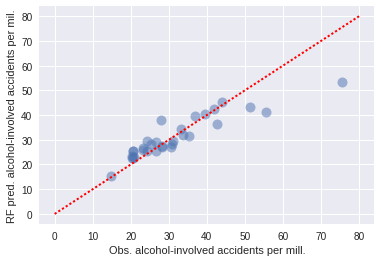

In [121]:
plt.plot(y_test, predicted_test, "o", markersize = 10, alpha = 0.5)
plt.ylabel('RF pred. alcohol-involved accidents per mil.')
plt.xlabel('Obs. alcohol-involved accidents per mill.')
plt.plot([0, 80], [0, 80], color='red', linestyle=':', linewidth=2)

#plt.savefig('obs_pred_test.png')

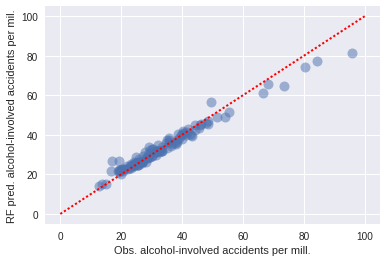

In [122]:
plt.plot(y_train, predicted_train, "o", markersize = 10, alpha = 0.5)
plt.ylabel('RF pred. alcohol-involved accidents per mil.')
plt.xlabel('Obs. alcohol-involved accidents per mill.')
plt.plot([0, 100], [0, 100], color='red', linestyle=':', linewidth=2)

plt.savefig('obs_pred_train.png')

In [65]:
#define rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [66]:
rmse(predicted_test, y_test)

5.9203651575757288

Feature ranking:
1. feature 11 (0.287167)
2. feature 9 (0.182564)
3. feature 2 (0.097665)
4. feature 12 (0.074040)
5. feature 15 (0.072951)
6. feature 13 (0.049123)
7. feature 14 (0.044082)
8. feature 6 (0.043884)
9. feature 10 (0.038214)
10. feature 8 (0.031325)
11. feature 1 (0.029320)
12. feature 7 (0.026464)
13. feature 5 (0.011630)
14. feature 0 (0.007657)
15. feature 3 (0.003914)
16. feature 4 (0.000000)


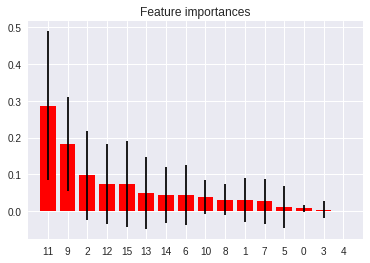

In [67]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [68]:
features.columns

Index(['YEAR', 'STATE_SHORT', 'POP_MIL', 'SUSPEND', 'INTERLOCK_1ST',
       'INTERLOCK_REPEAT', 'GALLONS_ALCOHOL_PER_CAP_21', 'BEER_TAX',
       'PERCENT_POVERTY', 'MEDIAN_INCOME', 'PERCENT_UNINSURE', 'LESS_HS_P',
       'HS_P', 'SOME_C_P', 'BACHELORS_P', 'GRAD_PROF_P'],
      dtype='object')

In [69]:
importances[indices]

array([ 0.28716716,  0.18256353,  0.09766523,  0.07404006,  0.07295146,
        0.04912283,  0.04408186,  0.04388381,  0.03821388,  0.03132475,
        0.02932047,  0.02646401,  0.01163011,  0.0076567 ,  0.00391415,  0.        ])

In [84]:
range(X_train.shape[1]), indices

(range(0, 16),
 array([ 9, 11,  2, 15, 12, 13, 14, 10,  6,  7,  1,  8,  5,  0,  3,  4]))

In [123]:
features.columns[indices]

Index(['MEDIAN_INCOME', 'LESS_HS_P', 'POP_MIL', 'GRAD_PROF_P', 'HS_P',
       'SOME_C_P', 'BACHELORS_P', 'PERCENT_UNINSURE',
       'GALLONS_ALCOHOL_PER_CAP_21', 'BEER_TAX', 'STATE_SHORT',
       'PERCENT_POVERTY', 'INTERLOCK_REPEAT', 'YEAR', 'SUSPEND',
       'INTERLOCK_1ST'],
      dtype='object')

## Multiple regression

In [70]:
X = X_train
y = y_train
model = sm.OLS(y, X).fit()
mr_predictions_train = model.predict(X)
mr_predictions_test = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ACH_MIL   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     7.451
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           1.28e-10
Time:                        18:48:40   Log-Likelihood:                -447.66
No. Observations:                 121   AIC:                             925.3
Df Residuals:                     106   BIC:                             967.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
YEAR                           2.0399      0.964      2.116      0.037         0.129     3.951
STATE_SHORT                    0.1556      0.099      1.564      0.121        -0.042     0.353
POP_MIL                       -1.0440      0.225     -4.642      0.000        -1.490    -0.598
SUSPEND                      -12.2971      3.519     -3.495      0.001       -19.273    -5.321
INTERLOCK_1ST              -1.202e-09   5.71e-10     -2.107      0.038     -2.33e-09 -7.08e-11
INTERLOCK_REPEAT               3.4216      3.147      1.087      0.279        -2.818     9.661
GALLONS_ALCOHOL_PER_CAP_21     0.0004      0.000      1.486      0.140        -0.000     0.001
BEER_TAX                      -6.9784      3.662     -1.906      0.059       -14.238     0.281
PERCENT_POVERTY               -1.6963      1.265     -1.341      0.183        -4.204     0.812
MEDIAN_INCOME                 -0.0003      0.000     -0.880      0.381        -0.001     0.000
PERCENT_UNINSURE               1.6191      0.330      4.904      0.000         0.964     2.274
LESS_HS_P                  -3969.1171   1919.737     -2.068      0.041     -7775.183  -163.051
HS_P                       -4023.7569   1933.394     -2.081      0.040     -7856.899  -190.615
SOME_C_P                   -4118.0165   1933.015     -2.130      0.035     -7950.407  -285.626
BACHELORS_P                -3955.9117   1934.026     -2.045      0.043     -7790.305  -121.518
GRAD_PROF_P                -4230.6115   1927.396     -2.195      0.030     -8051.862  -409.361
==============================================================================
Omnibus:                       23.721   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.279
Skew:                           0.978   Prob(JB):                     3.60e-08
Kurtosis:                       4.724   Cond. No.                     1.44e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
rmse(mr_predictions_test, y_test)

11.948340708282453

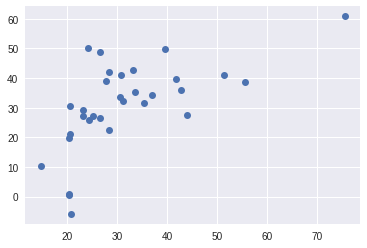

In [72]:
plt.plot(y_test, mr_predictions_test, "o")

## Regression Tree

In [93]:
regression_tree = tree.DecisionTreeRegressor(
 min_samples_split=30, min_samples_leaf=10,
  random_state=121)
regression_tree.fit(X_train,y_train)
score = np.mean(cross_val_score(regression_tree, X_train, y_train,
 scoring='mean_squared_error', cv=crossvalidation,
  n_jobs=1))
print('Mean squared error: %.3f' % abs(score))


Mean squared error: 143.777


/home/rlrognstad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/rlrognstad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/rlrognstad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/rlrognstad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

In [94]:
rt_pred_train = regression_tree.predict(X_train)
rt_pred_test = regression_tree.predict(X_test)

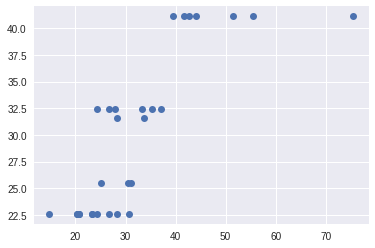

In [95]:
plt.plot(y_test, rt_pred_test, "o")

In [96]:
rmse(rt_pred_test, y_test)

7.9092602398722676

In [86]:
dot_data = tree.export_graphviz(regression_tree, out_file='tree.dot') 

In [87]:
digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 1.0\nmse = 1.0\nsamples = 2\nvalue = 1.5"] ;
1 [label="mse = 0.0\nsamples = 1\nvalue = 0.5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 0.0\nsamples = 1\nvalue = 2.5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}

SyntaxError: invalid syntax (<ipython-input-87-08312414ca44>, line 1)